# Manual Hyperparameter Tuning for a k-NN Classifier

In [1]:
# import packages
from sklearn import neighbors, datasets, model_selection

In [2]:
# load the data
cancer = datasets.load_breast_cancer()

In [3]:
# split data
X = cancer.data
y = cancer.target

In [4]:
# create the model
knn = neighbors.KNeighborsClassifier()

In [5]:
# Feed this classifier into a 10-fold cross-validation
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

In [6]:
# Printing cv shows the precision score calculated for each fold
print(cv)

[0.91666667 0.85       0.91666667 0.94736842 0.94594595 0.94444444
 0.97222222 0.92105263 0.96969697 0.97142857]


In [7]:
# Calculate and print the mean precision score for all folds
print(round(cv.mean(), 2))

0.94


In [8]:
# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=15)

In [9]:
# Feed this classifier into a 10-fold cross-validation
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(round(cv.mean(), 2))

0.93


In [10]:
# create a function to train the model
def evaluate_knn(k):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
    print(round(cv.mean(), 2))

In [11]:
# Try again with k = 7, 3, and 1
evaluate_knn(7)
evaluate_knn(3)
evaluate_knn(1)

0.93
0.93
0.92


In [12]:
# create a new model
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

In [13]:
print(round(cv.mean(), 2))

0.93


# Grid Search Hyperparameter Tuning for an SVM

In [14]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, model_selection

In [15]:
# load the data
digits = datasets.load_digits()
y = digits.target
X = digits.data

In [16]:
# create he model
clf = svm.SVC(gamma='scale')

In [17]:
# define the grid
grid = [{'kernel':['linear']}, 
       {'kernel':['poly'], 'degree':[2, 3, 4]}]

In [18]:
# Set up grid search k-fold cross-validation with 10 folds
cv_spec = model_selection.GridSearchCV(estimator=clf,
                                      param_grid=grid,
                                      scoring='accuracy',
                                      cv=10)

In [19]:
# train the model
cv_spec.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy')

In [20]:
# checking the results
print(cv_spec.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [21]:
# convert the results dictionary to a pandas DataFrame
results = pd.DataFrame(cv_spec.cv_results_)
print(results.loc[:, ['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False))

                            params  mean_test_score
2  {'degree': 3, 'kernel': 'poly'}         0.977734
3  {'degree': 4, 'kernel': 'poly'}         0.973284
1  {'degree': 2, 'kernel': 'poly'}         0.970500
0             {'kernel': 'linear'}         0.960487


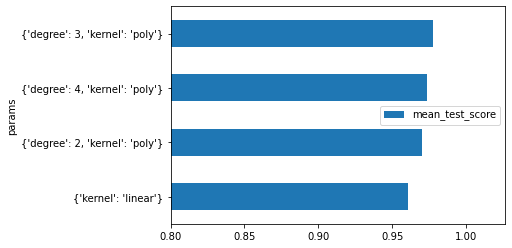

In [22]:
# visualizing
results.loc[:, ['params', 'mean_test_score']].sort_values('mean_test_score', ascending=True).plot.barh(x='params', xlim=(0.8))
plt.show()

# Random Search Hyperparameter Tuning for a Random Forest Classifier

In [23]:
# create the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=100)

In [24]:
# find out the value of features
X.shape[1]

64

In [25]:
# Set a discrete uniform distribution covering the range 1 to 64
from scipy import stats

param_dict = {'criterion': ['gini', 'entropy'],
             'max_features': stats.randint(low=1, high=X.shape[1])}

In [26]:
# set up the randomized search process
rscv = model_selection.RandomizedSearchCV(estimator=rfc,
                                         param_distributions=param_dict,
                                         n_iter=50,
                                         cv=5,
                                         scoring='accuracy',
                                         random_state=100)

In [27]:
# fit the model
rscv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002E051CD7388>},
                   random_state=100, scoring='accuracy')

In [28]:
# Create a pandas DataFrame from the results attribute
results = pd.DataFrame(rscv.cv_results_)

In [29]:
# remove hyperparameter duplicates
distinct_results = results.loc[:, ['params', 'mean_test_score']]
distinct_results.loc[:, 'params'] = distinct_results.loc[:, 'params'].astype('str')
distinct_results.drop_duplicates(inplace=True)
distinct_results.sort_values('mean_test_score', ascending=False).head()

,params,mean_test_score
3,"{'criterion': 'gini', 'max_features': 11}",0.940470
48,"{'criterion': 'gini', 'max_features': 4}",0.939913
19,"{'criterion': 'gini', 'max_features': 5}",0.937700
14,"{'criterion': 'gini', 'max_features': 3}",0.937694
21,"{'criterion': 'entropy', 'max_features': 8}",0.936582


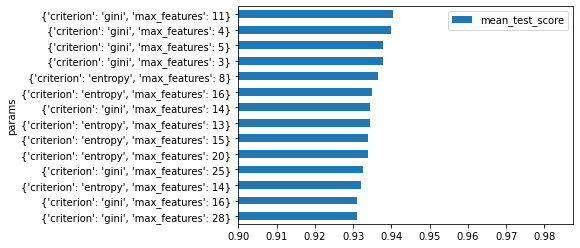

In [30]:
# visualize the result
distinct_results[distinct_results.mean_test_score > 0.93].sort_values('mean_test_score').plot.barh(x='params', xlim=(0.9))
plt.show()